# Data Exploratory and K-Mean Clustering

Thao Dinh

In [1]:
# Importing libraries that will be used
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #for ggplot-like style

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [4]:
bank = pd.read_excel('Bank_Dataset.xlsx')
bank.head()

,Status,Duration,Credit,Purpose,Amount,Savings,Employement,Rate,Gender_Status,Gender,...,Property,Age,Installment,Housing,Count_Credit,Job,Liability,Telephone,foreign_worker,Good/Bad_Customer
0,< 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,male,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,female,...,real estate,22,none,own,1,skilled employee / official,1,none,Yes,2
2,No Checking Account,12,critical account/other credits existing (not a...,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,male,...,real estate,49,none,own,1,unskilled - resident,2,none,Yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,male,...,if not real estate : building society savings ...,45,none,for free,1,skilled employee / official,2,none,Yes,1
4,< 0 DM,24,delay in paying off in the past,Car(new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,male,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,2


# Understanding data & missing value imputation

## This bank dataset represents number of credits given to different profiles of customers

**Q1. Show overall descriptive statistics of your dataset; number of data points, number of descriptive features, type of features, your target feature and its type, descriptive features for different target feature values**

In [5]:
# Using .info method to get answer to this question
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Status             1000 non-null   object
 1   Duration           1000 non-null   int64 
 2   Credit             1000 non-null   object
 3   Purpose            1000 non-null   object
 4   Amount             1000 non-null   int64 
 5   Savings            1000 non-null   object
 6   Employement        1000 non-null   object
 7   Rate               1000 non-null   int64 
 8   Gender_Status      1000 non-null   object
 9   Gender             1000 non-null   object
 10  Debtors            1000 non-null   object
 11  Residence          1000 non-null   int64 
 12  Property           1000 non-null   object
 13  Age                1000 non-null   int64 
 14  Installment        1000 non-null   object
 15  Housing            1000 non-null   object
 16  Count_Credit       1000 non-null   int64 
 

**Q2. Determine if any features have missing data and what should be done with the missing data. Explain why the decision was made for each feature. If there is no missing data, explain how you would handle missing data and why. Provide supporting visualizations with their analysis**

Currently, there are no features with missing data. But if there is any data missing then depending on the feature type we can either set an average number in missing cells or set values to 0 or keep them blank.
Considering few examples below:

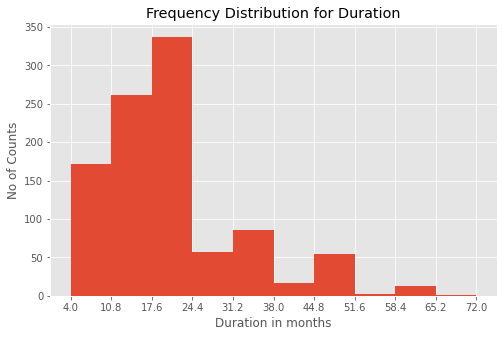

In [6]:
#### 1. Duration in Month ####
# Maximum data lies in 17.6 - 24.4 bucket range. The data also looks right skewed. 
# If we had missing data, we would put 0 in missing data as few customers might not have taken any loan as of now.
count,bin_edges=np.histogram(bank['Duration'])
bank['Duration'].plot(kind='hist',
                  figsize=(8,5),
                  xticks=bin_edges)
plt.title('Frequency Distribution for Duration')
plt.ylabel("No of Counts")
plt.xlabel("Duration in months")
plt.show()

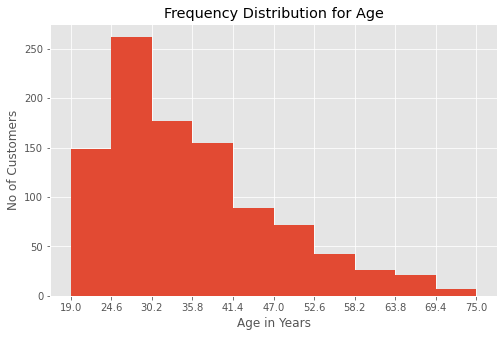

In [7]:
#### 2. Age in Years #### 
# One way can be to substitute the value by looking at similar data from other customers & add proxy value their age.
# The others can be to keep them blank or add an average age to all observations
# Similar age people tend to have almost similar financial background and thus can be substituted.
count,bin_edges=np.histogram(bank['Age'])
bank['Age'].plot(kind='hist',
                  figsize=(8,5),
                  xticks=bin_edges)
plt.title('Frequency Distribution for Age')
plt.ylabel("No of Customers")
plt.xlabel("Age in Years")
plt.show()

# This distribution also looks right skewed. Majority of customers are under the age 40

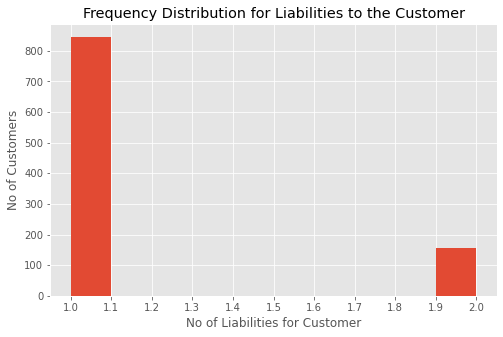

In [8]:
#### 3. Liability #### 
# Here we can set it as 0 as a customer might have no liability on them
count,bin_edges=np.histogram(bank['Liability'])
bank['Liability'].plot(kind='hist',
                  figsize=(8,5),
                  xticks=bin_edges)
plt.title('Frequency Distribution for Liabilities to the Customer')
plt.ylabel("No of Customers")
plt.xlabel("No of Liabilities for Customer")
plt.show()

# Variable Distribution

**Q3. Explore your features further in their distributions and plot their bar and box plots. How
are individual features distributed? Show outliers for each feature. Do you think any of
the outliers may impact your analysis? Why? Provide supporting visualizations with their
analysis**

In [9]:
# Firstly, checking what are the possible values that a feature can take. 
# This will help decide what graph to plot depending upon if the feature is categorical or numerical
bank.nunique()

Status                 4
Duration              33
Credit                 5
Purpose               10
Amount               921
Savings                5
Employement            5
Rate                   4
Gender_Status          4
Gender                 2
Debtors                3
Residence              4
Property               4
Age                   53
Installment            3
Housing                3
Count_Credit           4
Job                    4
Liability              2
Telephone              2
foreign_worker         2
Good/Bad_Customer      2
dtype: int64

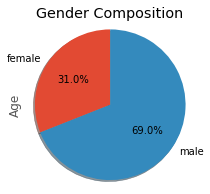

In [10]:
#### 1. Gender ####
# We have created 'Gender' column in excel
Gender = bank.groupby("Gender")['Age'].count()
Gender.head()

# Plot pie chart to see customer demographics in terms of gender
Gender.plot(kind='pie',
            figsize=(3,3),
            autopct = '%1.1f%%', 
            startangle = 90, 
            shadow = True)
plt.title('Gender Composition')
plt.axis('equal') 
plt.show()

# This bank data consists of 70% males and 30% females

Plotting bar graph for **relevant** categorical variables first to see how credit distribution looks like

Text(0.5, 0, 'Purpose')

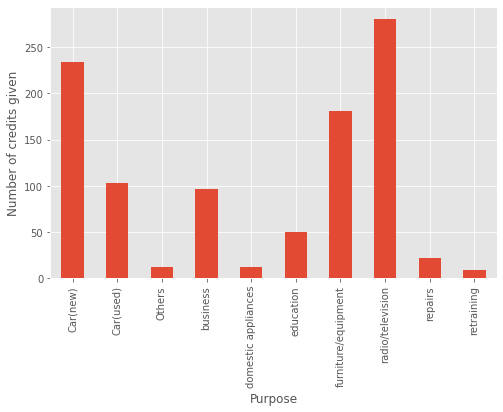

In [11]:
#### 2. Purpose ####
Purpose = bank.groupby(["Purpose"])['Age'].count()
Purpose.plot(kind = 'bar', figsize=(8,5))
plt.ylabel('Number of credits given')
plt.xlabel('Purpose')

# Majority of Credits/Loans were given for radio/television, followed by Car (new)

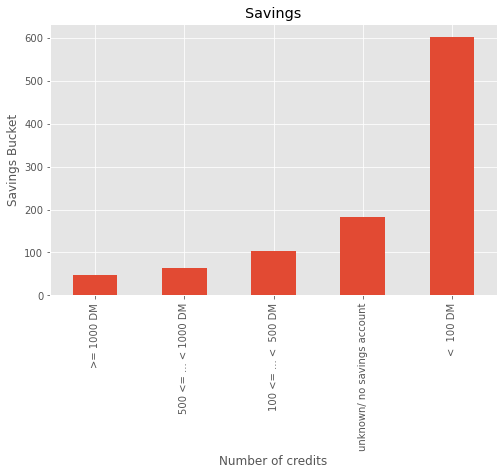

In [12]:
#### 3. Savings Bucket ####
Savings = bank.groupby("Savings")['Age'].count().sort_values()

Savings.plot(kind='bar',
          figsize=(8,5))
plt.title("Savings")
plt.ylabel("Savings Bucket")
plt.xlabel("Number of credits")
plt.show()

# Most of the customers have less than 100 Deutsche Marks (Germany Currency) in their savings account

Text(0.5, 0, 'Employment Status')

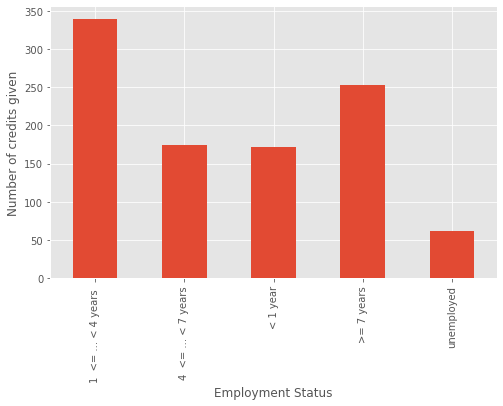

In [13]:
#### 4. Employment #### 
Employment = bank.groupby(["Employement"])['Age'].count()
Employment.plot(kind = 'bar', figsize=(8,5))
plt.ylabel('Number of credits given')
plt.xlabel('Employment Status')

# More Customers have 1-4 years of work experience

Text(0.5, 0, ' Current Credit Status')

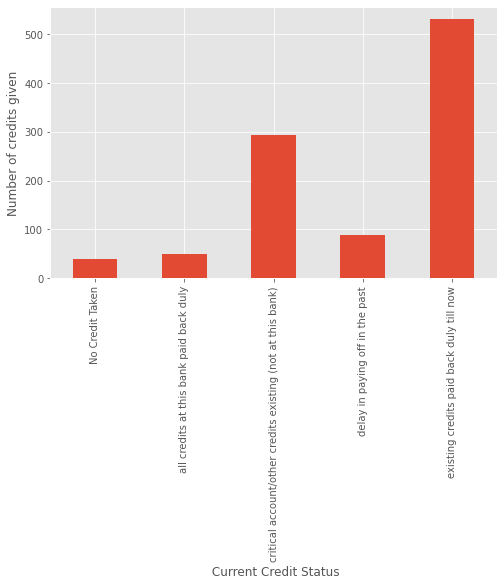

In [14]:
#### 5. Credit Status #### 
Credit = bank.groupby(["Credit"])['Age'].count()
Credit.plot(kind = 'bar', figsize=(8,5))
plt.ylabel('Number of credits given')
plt.xlabel(' Current Credit Status')

# Most of customers have taken cedits and are diligently paying until now as shown by last bar

Text(0.5, 0, ' Current Account Status')

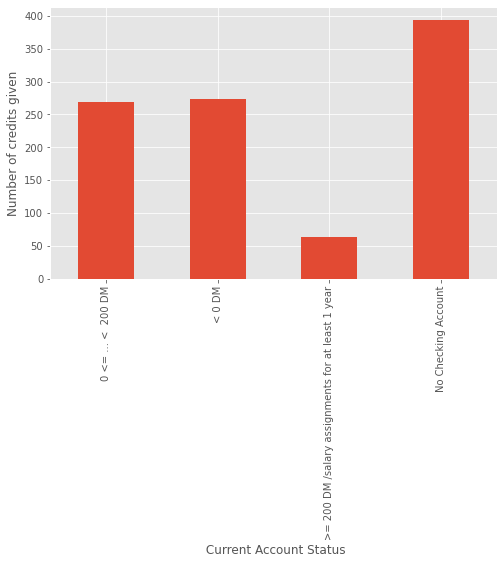

In [15]:
#### 6. Account Status #### 
Acc_Status = bank.groupby(["Status"])['Age'].count()
Acc_Status.plot(kind = 'bar', figsize=(8,5))
plt.ylabel('Number of credits given')
plt.xlabel(' Current Account Status')

# A lot of credits are given to customers with no checking account with the bank

Text(0.5, 0, ' Current Credit Status')

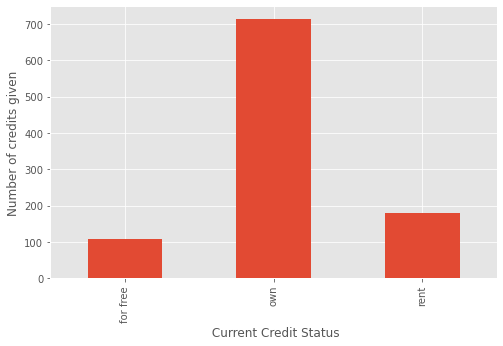

In [16]:
#### 7. Housing #### 
Housing = bank.groupby(["Housing"])['Age'].count()
Housing.plot(kind = 'bar', figsize=(8,5))
plt.ylabel('Number of credits given')
plt.xlabel(' Current Credit Status')

# Most customers (~700) have their own houes

Text(0.5, 0, ' Job type')

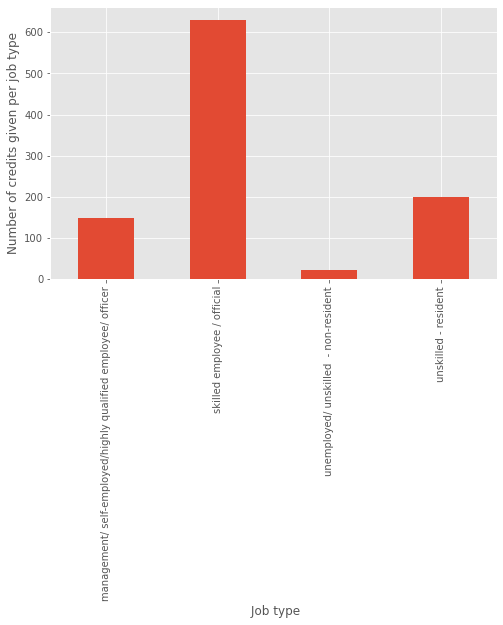

In [17]:
#### 8. Job Type #### 
Job = bank.groupby(["Job"])['Age'].count()
Job.plot(kind = 'bar', figsize=(8,5))
plt.ylabel('Number of credits given per job type')
plt.xlabel(' Job type')

# ~650 customers are skilled professionals followed by 200 unskilled residents

Box Plots/Histograms for **relevant** numerical variables to check the type of distribution

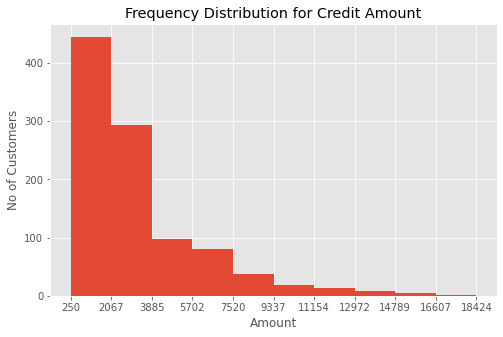

In [18]:
#### 9. Credit Amount - Histogram #### 
count,bin_edges=np.histogram(bank['Amount'])
bank['Amount'].plot(kind='hist',
                  figsize=(8,5),
                  xticks=bin_edges)
plt.title('Frequency Distribution for Credit Amount')
plt.ylabel("No of Customers")
plt.xlabel("Amount")
plt.show()

## The below histogram shows that the Distribution is right skewed
# This shows that majority of credit amount awarded to customers lie in the range 250-7500 DMs
# Let's check by plotting box plot

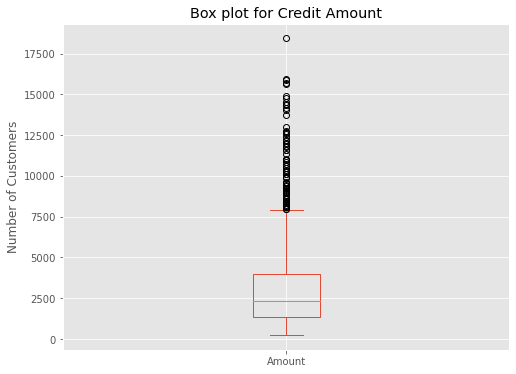

In [19]:
#### 9. Credit Amount - Box Plot #### 
bank['Amount'].plot(kind='box', figsize=(8,6))
plt.title('Box plot for Credit Amount')
plt.ylabel('Number of Customers')

plt.show()

# Box plot also shows that majority customers lie in the range 250-7500 DM
# All data points beyond 7500 are outliers
# We need not remove outliers for K means clustering 
# because this can be an important factor that can help differentiate between clusters

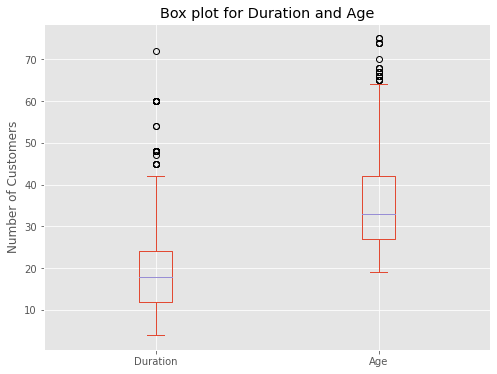

In [20]:
#### 10 & 11. Duration and Age - Box Plot #### 
# Histogram for Duration covered in Q2
bank[['Duration', 'Age']].plot(kind='box', figsize=(8,6)) 
plt.title('Box plot for Duration and Age')
plt.ylabel('Number of Customers')

plt.show()

# As per box plots, if duration is more than 40 months then it considered an outlier
# All data points with age over ~62 are outliers
# Again, we need not remove outliers for K means clustering  
# because these can prove to be important factors that help differentiate between clusters. 
# We'll do scaling to get them on similar scale

Out of 20 variables, we checked distributions of 11 variables. The other 9 variables are not enriched with information as expected. For ex. telephone takes value yes or no.
9 variables not considered for now - 1. Rate, 2. Debtors, 3. Residence, 4. Property, 5. Installment, 6. Count Credit, 7. Liability, 8. telephone, 9. foreign worker

/Users/minhthao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/minhthao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/minhthao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

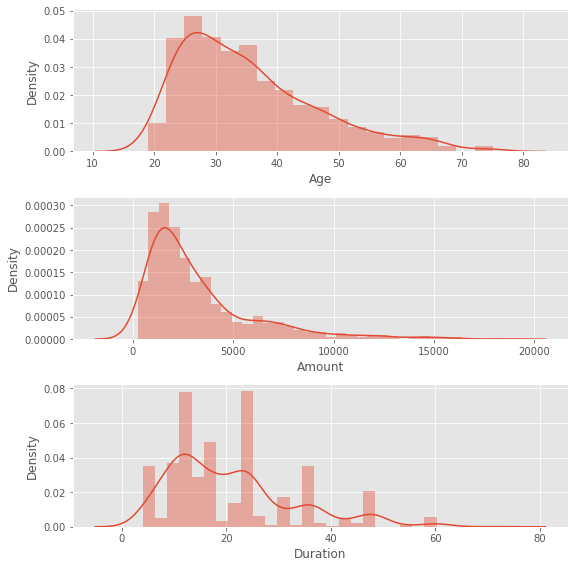

In [21]:
### Drawing histograms for variables already covered before to check for their skewness
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(bank["Age"], ax=ax1)
sns.distplot(bank["Amount"], ax=ax2)
sns.distplot(bank["Duration"], ax=ax3)
plt.tight_layout()

# Preparing Data for Clustering

**Q4. What data pre-processing techniques do you apply? E.g., encoding features, missing
values, scaling, etc. Explain each process and why you use it**

For K-means clustering, we shall use scaling for numerical variables and encoding for categorical variables. We do not have missing values in current data, so we need not to do any treatment for those.

1. **Scaling**: K means algorithm requires features to be scaled. This is the process of standardizing all variables in the dataset to get them around the same scale. This helps remove skewness from the data.
    
    How – 
    Normal standard distribution; Z~(X-U)/S.D

    Why –
    Variables are measured at different scales, and do not contribute equally to the fit of the model. 

/Users/minhthao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/minhthao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/minhthao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

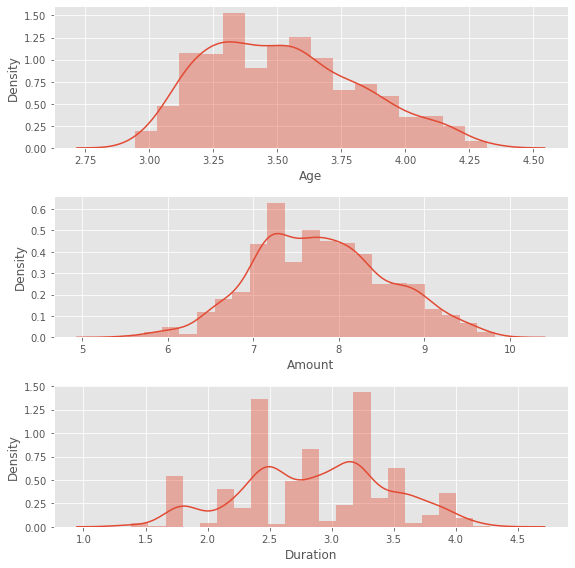

In [22]:
# Taking log functions of Age, Amount and Duration
col_names = ["Age","Amount", "Duration"]
Selected_Cols = bank[col_names]
features = np.log(Selected_Cols)

# Re-plotting to see if we were able to remove skewness from the data
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(features["Age"], ax=ax1)
sns.distplot(features["Amount"], ax=ax2)
sns.distplot(features["Duration"], ax=ax3)
plt.tight_layout()

In [23]:
# Calling standard scaler function to scale these variables
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Age,Amount,Duration
0,2.271006,-0.933901,-1.864869
1,-1.446152,1.163046,1.708369
2,1.226696,-0.181559,-0.673790
3,0.942455,1.525148,1.478913
4,1.488620,0.904743,0.517289


2. **Encoding features**: Hot encoding for categorical variables
    
    K means clustering doesn't process categorical variables as is. Thus, Encoding is required.

In [24]:
# First, Encoding 'Gender' variable
Gender = bank['Gender']
scaled_features2 = scaled_features.join(Gender)
scaled_features2 = pd.get_dummies(scaled_features2, prefix=None, 
                                  prefix_sep='_', dummy_na=False, 
                                  columns=None, sparse=False, drop_first=False, 
                                  dtype=None)
scaled_features2 = scaled_features2.drop(['Gender_male'],axis=1)

scaled_features2.head()

,Age,Amount,Duration,Gender_female
0,2.271006,-0.933901,-1.864869,0
1,-1.446152,1.163046,1.708369,1
2,1.226696,-0.181559,-0.673790,0
3,0.942455,1.525148,1.478913,0
4,1.488620,0.904743,0.517289,0


In [25]:
# Second, Encoding 'Purpose' variable
Purpose = bank['Purpose']
scaled_features2 = scaled_features2.join(Purpose)
scaled_features2 = pd.get_dummies(scaled_features2, prefix=None, 
                                  prefix_sep='_', dummy_na=False, 
                                  columns=None, sparse=False, drop_first=False, 
                                  dtype=None)

# This can be used to remove one column from all the columns created to remove duplicate information
scaled_features2 = scaled_features2.drop(['Purpose_Others'],axis=1)

scaled_features2.head()

,Age,Amount,Duration,Gender_female,Purpose_Car(new),Purpose_Car(used),Purpose_business,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining
0,2.271006,-0.933901,-1.864869,0,0,0,0,0,0,0,1,0,0
1,-1.446152,1.163046,1.708369,1,0,0,0,0,0,0,1,0,0
2,1.226696,-0.181559,-0.673790,0,0,0,0,0,1,0,0,0,0
3,0.942455,1.525148,1.478913,0,0,0,0,0,0,1,0,0,0
4,1.488620,0.904743,0.517289,0,1,0,0,0,0,0,0,0,0


# Running K-means Clustering & PCA

**Q6: What kind of ML approaches and algorithms do you choose to use and why? E.g.,
supervised, regression, classification, binary, multi-class, split rate of data, logistic
regression, SVM, decision trees etc. Provide supporting visualizations with their analysis**<br>

Since we want to perform customer segmentation without label, unsupervised algorithm is appropriate. We use K-means to perform clustering for our bank dataset.
Also, before running Kmeans, we need to define which variables are important for the model

**Running K-means on three numerical variables first**

In [26]:
# Saving all pre-processing work before feeding to the model in another dataframe
df_in = scaled_features2[:]

# Initially we use quantitative features Age, Amount and Duration as features for clustering
df_aad = df_in[["Age","Amount","Duration"]]
kmeans = KMeans(n_clusters=4, random_state=10).fit(df_aad) # n specifies the number of clusters we want
labels_kmeans = kmeans.labels_

In [27]:
# Add labels after running models to the 3 features
df_aad['label'] = labels_kmeans
df_aad.head()

/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/846710921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aad['label'] = labels_kmeans


,Age,Amount,Duration,label
0,2.271006,-0.933901,-1.864869,2
1,-1.446152,1.163046,1.708369,3
2,1.226696,-0.181559,-0.673790,2
3,0.942455,1.525148,1.478913,3
4,1.488620,0.904743,0.517289,3


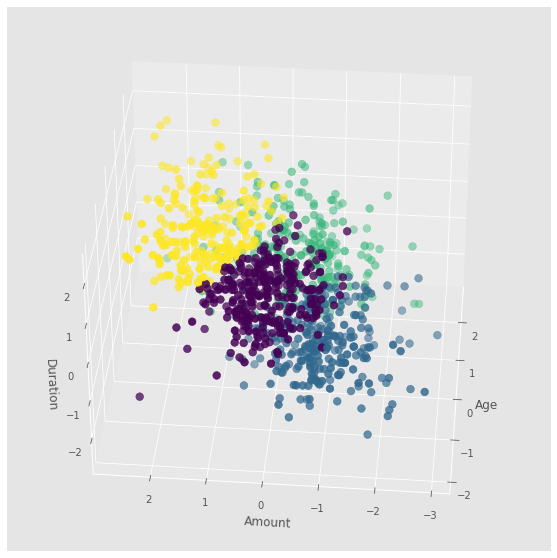

In [28]:
# Checking how the clusters look like
# 3D Plot as we did the clustering on the basis of 3 input features
def scatter_3D(df):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    labels = df.label.unique()
    ax.scatter(df.Age, 
               df.Amount, 
               df.Duration, 
               c=df.label, cmap = 'viridis', s=60)
    ax.view_init(35, 185)
    plt.xlabel("Age")
    plt.ylabel("Amount")
    ax.set_zlabel('Duration')
    plt.show()

scatter_3D(df_aad)

# The yellow and blue clusters look segregated. But purple and green clusters are overlapping others.
# Adding other variables and using techniques such as PCA to see if we can better the cluster segregation.

* PCA is used to select the features for the model <br>
https://www.keboola.com/blog/pca-machine-learning#:~:text=Principal%20Component%20Analysis%20(PCA)%20is,%2Dnoising%2C%20and%20plenty%20more.

PCA is a method used to reduce number of variables in data by extracting important one from a large pool.


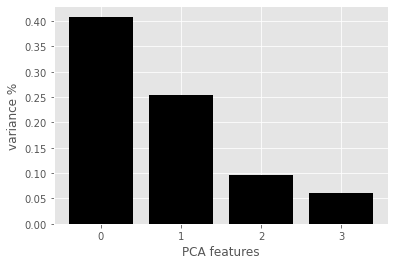

In [29]:
# Including numerical and categorical features, there are 13 features. 
# We decided to perform PCA before running K-means to find the important features to our model

pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_in)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(df_pca)

We generally apply Pareto rule i.e How many features cover majority of variance.

In [30]:
# In this case, first two PCA features are able to explain 65% of the variance. Thus setting components to '2'
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_in)
df_pca

array([[ 2.03294039,  2.27720209],
       [-1.97814618, -1.5386542 ],
       [ 0.60165456,  1.28686341],
       ...,
       [ 1.50148485,  0.31904647],
       [-0.87693643, -1.37399792],
       [-1.80523548, -0.71194273]])

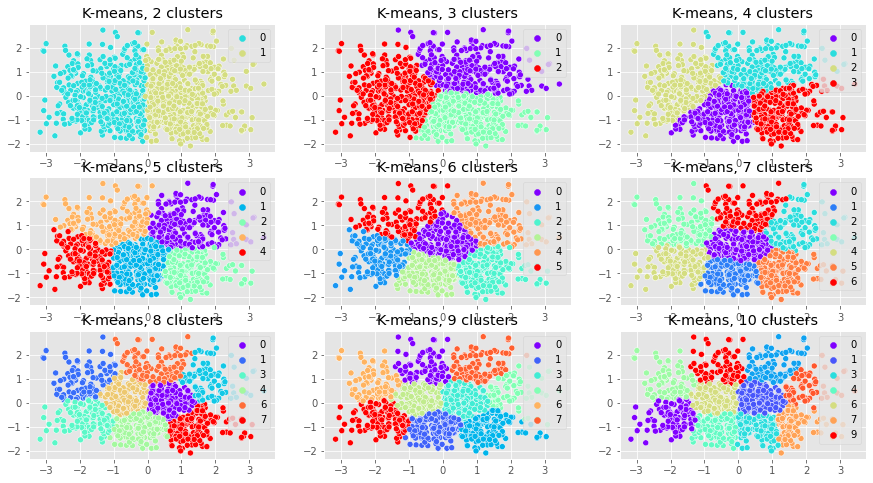

In [31]:
# Run K-means with different numbers of cluster groups and plot to see how the groups cluster
n_cluster = [2,3,4,5,6,7,8,9,10]
fig = plt.figure(figsize = (15,8)) # create figure

sub_plots = []
for i in range(len(n_cluster)):
    sub_plots.append(fig.add_subplot(3,3,i+1))

for i in range(len(n_cluster)):
    kmeans = KMeans(n_clusters = n_cluster[i], random_state= 10).fit(df_pca)
    labels_kmeans = kmeans.labels_
    sns.scatterplot(x = df_pca[:,0], y = df_pca[:,1], ax = sub_plots[i], hue=labels_kmeans, palette='rainbow')
    sub_plots[i].set_title("K-means, {} clusters".format(n_cluster[i]))
plt.show()


* For K-mean with cluster numbers from 2-4, the model is over-generalize. The shape of each cluster is more square comparing with preferable spherical shape.
* For cluster numbers from 5-7, the clusters shape is spherical. Each cluster seems well separated. This is an indication that the numbers of clusters within this range is appropriate.
* For cluster numbers from 8-10, the clusters look quite similar to previous row and there is no significant benefit for increasing number of groups, because more clusters defeat the purpose of K-means Clustering

We can also cross verify the number of clusters using elbow diagram

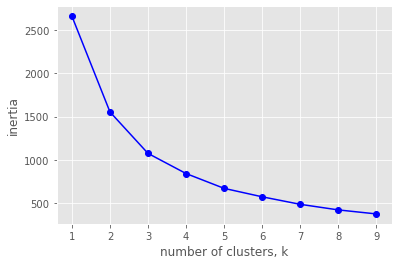

In [32]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='Blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# From the diagram below, since the slope is getting constant at 6, we can base our results on '6'

# Model Evaluation

**Q5: Analyze distribution of your target variable. Is it balanced or imbalanced? Do you think
any of these may cause a problem and why? Provide supporting visualizations with their
analysis.** <br>

Since we are doing unsupervised learning (K-means), there is no target variable. Therefore, we will study the characteristics of each cluster.

In [33]:
# K-mean with PCA with 6 cluster performs the best based on evaluation metrics used above
kmeans = KMeans(n_clusters=6, random_state=10).fit(df_pca)
df_out = df_in[:]
df_out['label'] = kmeans.labels_

/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/1600102357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['label'] = kmeans.labels_


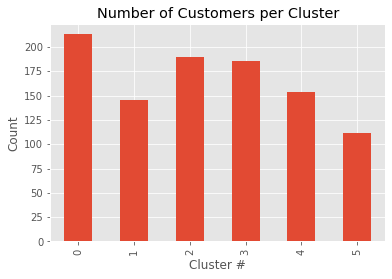

In [34]:
# Count number of customers for each cluster
n_count = df_out.groupby(["label"])['Age'].count()
n_count.plot(kind = 'bar')
plt.xlabel("Cluster #")
plt.ylabel("Count")
plt.title("Number of Customers per Cluster")
plt.show()

In [35]:
# Check - assign the label back to the original data to learn some charateristics.
# Change log variables of Age, Amount and Duration back to the original variables
df_out["Age"] = bank["Age"]
df_out['Amount'] = bank["Amount"]
df_out["Duration"] = bank["Duration"]

# Group by label and get the mean to learn some characteristics
grouped_df = df_out.groupby(['label']).mean().round(1)
grouped_df

/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/1315859829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out["Age"] = bank["Age"]
/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/1315859829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Amount'] = bank["Amount"]
/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/1315859829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Age,Amount,Duration,Gender_female,Purpose_Car(new),Purpose_Car(used),Purpose_business,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining
label,,,,,,,,,,,,,
0,37.5,2485.7,18.4,0.2,0.3,0.1,0.1,0.0,0.0,0.2,0.3,0.0,0.0
1,30.6,7275.3,39.0,0.2,0.1,0.2,0.2,0.0,0.1,0.1,0.2,0.0,0.0
2,26.6,1275.3,11.1,0.5,0.2,0.0,0.1,0.0,0.1,0.2,0.4,0.0,0.0
3,25.9,3036.0,22.7,0.5,0.2,0.1,0.1,0.0,0.0,0.3,0.3,0.0,0.0
4,49.0,1352.2,10.4,0.3,0.3,0.0,0.0,0.0,0.1,0.1,0.3,0.0,0.0
5,51.1,5996.8,30.3,0.2,0.2,0.2,0.1,0.0,0.0,0.2,0.2,0.0,0.0


**Q7. What evaluation metrics you used to evaluate the performance of your model.
Discuss the results of your model as to which model performs better and why this would be the case. 
How would your model perform based on the results? What shortcomings your model has and possible implications? What would you do to improve the results?**


We have used two evaluation metrics until now to evaluate the performance of model <br>
1. Cluster segregation diagrams
2. Elbow diagram

Both of these help in deciding the optimal number of clusters that should be used based on data. 
We can also calculate silhoutte score for '6' clusters

**Silhouette Coefficient:** A metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.<br>
1 : Clusters are well apart from each other and clearly distinguished.<br>
0 : Clusters are indifferent<br>
-1: Clusters are assigned in the wrong way

In [36]:
# Silhouette score
print(silhouette_score(df_pca, model.labels_, metric='euclidean')) 

0.35555112880550493


-> Better Model: We produced two k-means clustering results. The one with 6 clusters and 13 features turned out to be better as it better segregated the data points.

-> Model Performance: Given we got a silhoutte score of 0.36, it means the model is performing reasonably.

-> Model shortcomings: <br>1. Limited number of observations means limited learning the model can do<br>
2. We can include more variables to see if we can improve silhoutte score<br>
3. No proper target variable

-> Model Improvement: <br>1. Trial and Error approach on variables and number of clusters to improve model performance<br>
2. Explore and Research more techniques pertaining to K-means

**Q8. Reflect on your thought process, steps and explain what kind of stages and processes you have gone through to make decisions in each step. For instance, what led you to choose the evaluation metric you use? what motivated your selection of ML algorithms for prediction? why did you choose the preprocessing techniques you used? Provide supporting visualizations with their analysis**

Answered in word doc.

In [38]:
n_clusters = [2,3,4,5,6,7,8,9]
score= []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=10).fit(df_pca)
    df_out = df_in[:]
    df_out['label'] = kmeans.labels_
    score.append(silhouette_score(df_pca, df_out['label'], metric='euclidean'))
score

/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/1171010212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['label'] = kmeans.labels_
/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/1171010212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['label'] = kmeans.labels_
/var/folders/5d/9jrnkbxx5bb_l2v7b5pxxnfm0000gn/T/ipykernel_25782/1171010212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

[0.3651781765152123,
 0.362057544932541,
 0.33777736026093014,
 0.34542702279984194,
 0.33835111189157613,
 0.34240283667652954,
 0.3555161662897839,
 0.3574405325125709]